<a href="https://colab.research.google.com/github/smayo2/smayo2.github.io/blob/master/sentiweb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#SENTIWEB: A tool for determining the overall sentiment of your web page
#Babatope Ayo

#ensure corpora are installed, 
#first time uncomment & run line below: 
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


OVERALL POLARITY OF BLOB:0.18467317100400232
Average sentiment: 0    0.136567
dtype: float64


(-0.5, 399.5, 199.5, -0.5)

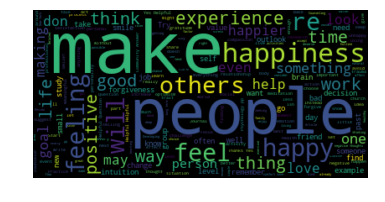

In [27]:

from textblob import TextBlob
from bs4 import BeautifulSoup
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re 

#get web text
web_url = "https://www.wikihow.com/Be-Happy"
#web_url = "https://www.britannica.com/topic-browse/History/Historical-Disasters"
web_text = requests.get(web_url).text     

# do some web scraping
raw_soup = BeautifulSoup(web_text, 'html.parser')

#Alternatively remove previous two lines  
#and uncomment next two lines to filter text by attributes
#the_soup1 = BeautifulSoup(web_text, 'html.parser')
#tag2 in raw_soup.find_all(attrs={"itemprop": "articleBody"}):

#ignore scripts
for tag in raw_soup.find_all("script"):
  tag.replace_with(" ")
  
#find the sections with required text
tag_text = [ ]
for tag2 in raw_soup.find_all(class_= "sticky"): 
  tag_text.append(tag2.get_text(" ", strip=True))
  
#convert to string  
the_text2 = str(tag_text)

#consider only alphabetical text and remove links
the_text= ' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", the_text2).split()) 

#sentiment for sentences       
blob = TextBlob(the_text)
#print("Words in blob: {}".format(blob.words))
#print("Sentences in blob: {}".format(blob.sentences))
print("OVERALL POLARITY OF BLOB:{}".format(blob.sentiment.polarity))

pol = []
for sentence in blob.sentences:
  #sentence=sentence.words.lemmatize()
  this_pol = sentence.sentiment.polarity
  pol.append(this_pol)

#print average sentiment
dfPol = pd.DataFrame(pol)
print("Average sentiment: {}".format(dfPol.mean()))

#get Word_cloud
# Generate a word cloud image
wordcloud = WordCloud().generate(the_text)

# Show the Word cloud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#ref:https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/